<div>
<img style="float: right;" src="cor-presse-logo-rossmann.png">

<div style="text-align=left">

# Final Project: sales forcasting

## Case study: Rossman chain stores sales dataset
  
</div>

</div>


### Project description: 

Rossman  store sales dataset contain the daily sales of over 1000 stores of Rossman drug store chain  across Genrmany, from January 2013 to july 2015.
the challege is to create a Sales prediction model to help Rossman store's manager to predict 6 weeks sales which will help them to set  targets for the sales team and design incentives for them.

The dataset provided contains 4 csv files: train.csv, test.csv, store.csv, sample_submission.csv

train.csv and test.csv contain the daily sells by store
store.csv contains the characteristics of each store

**Fields description**

Bellow the description of the fields contained on the provided datasets:
Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## 1. Import libraries

In [82]:
import pandas as pd
import  matplotlib.pyplot as plt
import datetime
import seaborn as sns


## 2. Load and explore dataset

The dataset was downloaded from Kaggle an it contains 3 csv files: train.csv, test.csv and store.csv

### 2.1  train.csv

### a. Load data

In [83]:
train_data=pd.read_csv("rossmann-store-sales/train.csv", sep=',')
train_data.describe()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### b. Correct the mixed type of the 7 th column: StateHoliday by replancing 0 by "0" (indicates that the day of observation is not a holiday)

In [84]:
train_data["StateHoliday"]=train_data["StateHoliday"].apply(lambda x: "0" if x==0 else x)


### c.Check the existance of Nan values

In [85]:
#check the existance of Nan values
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No Nan Value, Great!

### c. Delete features corresponding of days where stores are closed and there is no sales
according to Rossman competetion statement, the line with no sales are ignored

In [86]:
#Check for entries where there is no sales and stores are closed
del_data=train_data.query('Sales == 0 and Open == 0')
del_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [87]:
# Delete  the 172817 / 1 001599 'rows corresponding to no sales and closed store 
del_indexes= del_data.index
train_data.drop(del_indexes, inplace=True)

### 1.2 store.csv

### a. Load data

In [88]:
store_data=pd.read_csv("rossmann-store-sales/store.csv", sep=',')
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### b. Check the existance of Nan values

In [89]:
#check the existance of Nan values
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### c. CompetitionDistance Field Nan values


In [90]:
#CompetitionDistance missing values
store_data[pd.isnull(store_data.CompetitionDistance)]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


* Nan values seem to be just missed fill, replace their values with median



In [91]:
# Missing values seems to be just missed fill, replace them with median
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)


### d. Nan values of fields related to  Promo2: Promo2SinceWeek, Promo2SinceYear, PromoInterval

In [92]:
# Promo2SinceWeek Promo2SinceYear PromoInterval Nan Values
na_data=store_data[pd.isnull(store_data.Promo2SinceWeek)]
na_data2=store_data[pd.isnull(store_data.Promo2SinceYear)]
na_data3=store_data[pd.isnull(store_data.PromoInterval)]
print("Promo2SinceWeek Nan and Promo2=1: ",na_data[na_data.Promo2==1].shape)
print("Promo2SinceYear Nan and Promo2=1: ",na_data2[na_data2.Promo2==1].shape)
print("PromoInterval Nan and Promo2=1: ",na_data3[na_data3.Promo2==1].shape)

Promo2SinceWeek Nan and Promo2=1:  (0, 10)
Promo2SinceYear Nan and Promo2=1:  (0, 10)
PromoInterval Nan and Promo2=1:  (0, 10)


* When there is no promotion (promo2=0) it's logical to not have Promo2SinceWeek, Promo2SinceYear and PromoInterval, replace Na vales with 0

In [93]:
# When there is no promotion (promo2=0) it's logical to not have Promo2SinceWeek, Promo2SinceYear and PromoInterval, replace Na vales with 0
store_data['Promo2SinceWeek'].fillna(0, inplace=True)
store_data['Promo2SinceYear'].fillna(0, inplace=True)
store_data['PromoInterval'].fillna(0, inplace=True)

### e. CompetitionOpenSinceMonth and CompetitionOpenSinceYear Nan values

In [94]:
# fill CompetitionOpenSinceMonth and CompetitionOpenSinceYear missing values with 0
store_data['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(0, inplace=True)



# 3. Join train data set with additinonal stores'informations 

In [95]:
#inner join option ensure that the final dataset contains only observations that exist on both train and store dataset
joined_data=pd.merge(train_data, store_data, how = 'inner', on = 'Store')
joined_data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,1,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,1,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,1,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


# 4. Data engineering

### 4.1 Data extraction
1. Explode Date field into 4 th: day, year, month, week of year to better explore the trends

In [96]:
#time series
joined_data["Date"]=pd.to_datetime(joined_data["Date"])
joined_data["Year"]=joined_data["Date"].dt.year.astype(str).astype(int)
joined_data["Month"]=joined_data["Date"].dt.month.astype(str).astype(int)
joined_data["Day"]=joined_data["Date"].dt.day.astype(str).astype(int)
joined_data["MonthYear"]=joined_data["Month"].astype("str")+"/"+joined_data["Year"].astype(str)


#joined_data.drop(["Date"], axis=1, inplace=True)


2. add a daily sales per customer(How does customer spend on store a day) field for each observatoon 

In [97]:
# SalesPerCustomers variable
joined_data["SalesPerCustomers"]=joined_data["Sales"]/joined_data["Customers"]
joined_data["SalesPerCustomers"].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalesPerCustomers, dtype: float64

In [98]:
joined_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,MonthYear,SalesPerCustomers
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,2015,7,31,7/2015,9.482883
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,2015,7,30,7/2015,9.194139
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,2015,7,29,7/2015,9.143403
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,2015,7,28,7/2015,8.948214
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,2015,7,27,7/2015,9.970588
5,1,6,2015-07-25,4364,500,1,0,0,0,c,...,2008.0,0,0.0,0.0,0,2015,7,25,7/2015,8.728000
6,1,5,2015-07-24,3706,459,1,0,0,0,c,...,2008.0,0,0.0,0.0,0,2015,7,24,7/2015,8.074074
7,1,4,2015-07-23,3769,503,1,0,0,0,c,...,2008.0,0,0.0,0.0,0,2015,7,23,7/2015,7.493042
8,1,3,2015-07-22,3464,463,1,0,0,0,c,...,2008.0,0,0.0,0.0,0,2015,7,22,7/2015,7.481641
9,1,2,2015-07-21,3558,469,1,0,0,0,c,...,2008.0,0,0.0,0.0,0,2015,7,21,7/2015,7.586354


* A customer spend on average 9.50 $ per day on Rossman Drog stores

3. add Holiday variable to tell if the day where the observation is taken is a holiday or not (whatever it's school or state )

In [99]:
joined_data["StateHoliday2"]=joined_data.apply(lambda x: 0 if x["StateHoliday"]=="0" else 1,axis=1)

# 5. Data visualization
By intuition, sales are influenced by customers, promotions, holidays, competetion, ... the next section will be approve or not these assemptions!

In [100]:
plt.style.use("ggplot")#predefined style to make prettiest plot

* From the plot bellow we can notice that there is positive correlation between Sales and the number of customers

## 5.1 Evaluate the relationship between Sales and customers

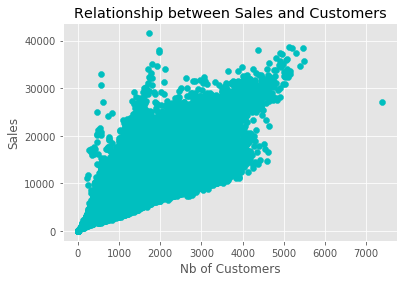

In [101]:
plt.scatter(joined_data.Customers, joined_data.Sales, color = 'c')
plt.title("Relationship between Sales and Customers")
plt.xlabel('Nb of Customers')
plt.ylabel("Sales")
plt.show()

* We can see that there is a positive Correlation between Sales and number of customers

## 5.2 Sales distribution during 3 years of collected data

In [102]:
avg_month_year_sales_customers= joined_data.groupby("MonthYear")[["Sales","Customers"]].mean()
avg_month_year_sales_customers_df = pd.DataFrame({"MonthYear": avg_month_year_sales_customers.index, "AvgSales_MY": avg_month_year_sales_customers["Sales"], "AvgCustomers_MY": avg_month_year_sales_customers["Customers"]}, columns=["MonthYear", "AvgSales_MY", "AvgCustomers_MY"])
avg_month_year_sales_customers_df["MonthYear"]=avg_month_year_sales_customers_df["MonthYear"].apply(lambda x: datetime.datetime.strptime(x,"%m/%Y"))
avg_month_year_sales_customers_df["Year"]=avg_month_year_sales_customers_df["MonthYear"].dt.year

avg_month_year_sales_customers_df["Month"]=avg_month_year_sales_customers_df["MonthYear"].dt.month

avg_month_year_sales_customers_df.head(10)

,MonthYear,AvgSales_MY,AvgCustomers_MY,Year,Month
MonthYear,,,,,
1/2013,2013-01-01,6239.641380,705.962209,2013,1
1/2014,2014-01-01,6539.402563,727.706698,2014,1
1/2015,2015-01-01,6913.177694,733.945729,2015,1
10/2013,2013-10-01,6473.347016,737.194136,2013,10
10/2014,2014-10-01,6757.320303,770.919760,2014,10
11/2013,2013-11-01,6904.509503,758.266507,2013,11
11/2014,2014-11-01,7539.603854,812.833616,2014,11
12/2013,2013-12-01,8613.455299,887.674845,2013,12
12/2014,2014-12-01,8603.805210,885.434361,2014,12


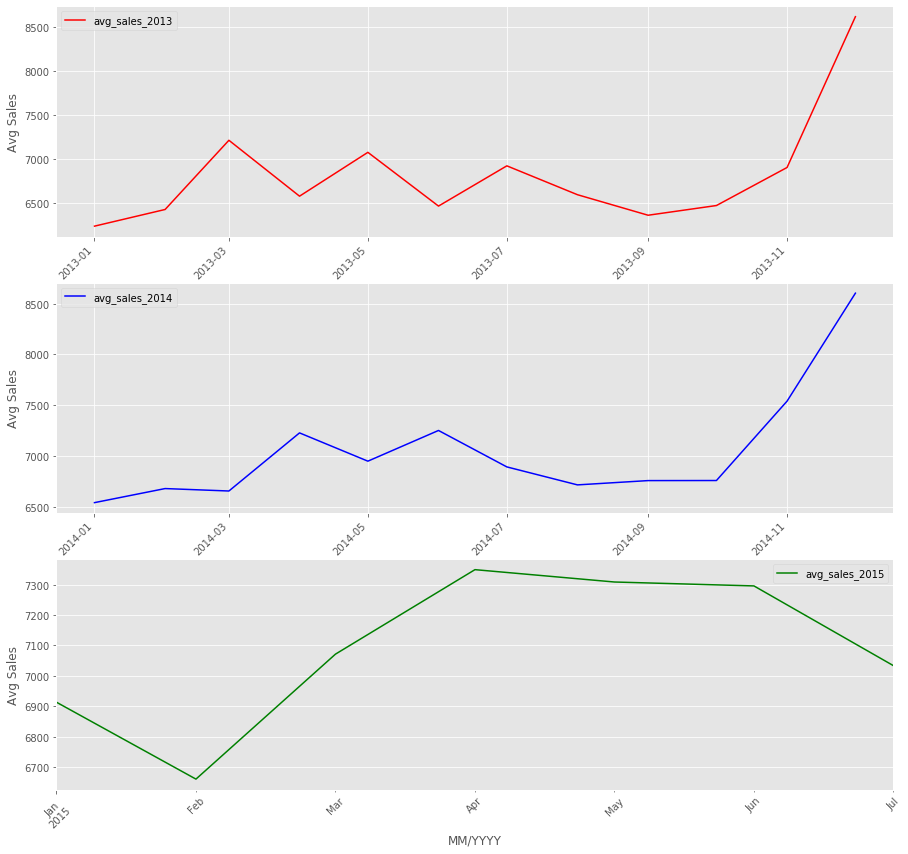

In [103]:
fig, (ax1, ax2,ax3) = plt.subplots(3, figsize=(15, 16))
axi1=avg_month_year_sales_customers_df[avg_month_year_sales_customers_df["Year"]==2013].plot(x="MonthYear",y="AvgSales_MY",ax=ax1,color = 'red',rot=45,label="avg_sales_2013")
axi2=avg_month_year_sales_customers_df[avg_month_year_sales_customers_df.Year==2014].plot(x="MonthYear",y="AvgSales_MY",ax=ax2,color = 'blue',rot=45,label="avg_sales_2014")
axi3=avg_month_year_sales_customers_df[avg_month_year_sales_customers_df.Year==2015].plot(x="MonthYear",y="AvgSales_MY",ax=ax3, color = 'green',rot=45,label="avg_sales_2015")


axi1.set(ylabel="Avg Sales")
axi2.set(ylabel="Avg Sales")
axi3.set(ylabel="Avg Sales",xlabel="MM/YYYY")


plt.show()


On 2013 and 2014 the average sales follow the same trends, the sales decrease from june (summer holiday) to increase from  november (endyear Holiday) we notice that there is a kind of seasonability on Sales trend.
On 2015 the dataset contains data until july, but from january to july the sales pattern looks like those from 2013 and 2014

## 5.3 Saisonability on sales?

## a) Sales and Months

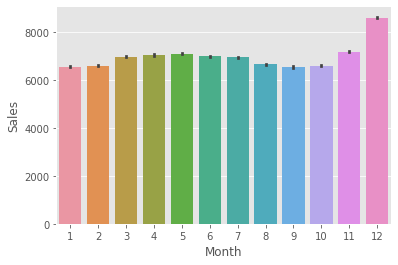

In [104]:
ax = sns.barplot(x="Month", y="Sales", data=joined_data)

we can notice that sales are influenced by Month variable, sales are important and more or less constant from Mars to July, then they drop down slightly from august to increase at the end of year. December is the month  of most sales ( probabely because of the end year celebrations)

## b) Sales and days of week

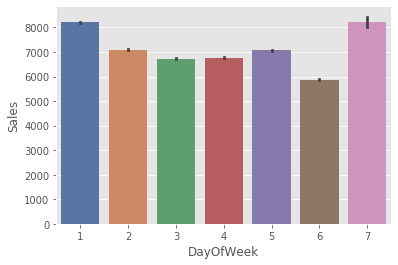

In [105]:
ax = sns.barplot(x="DayOfWeek", y="Sales", data=joined_data,palette="deep")

According to the plot above, Sales are most important on Monday(1) and Sunday(7). the first day of week and the week end

## 5.4 Relationship between sales and holidays?

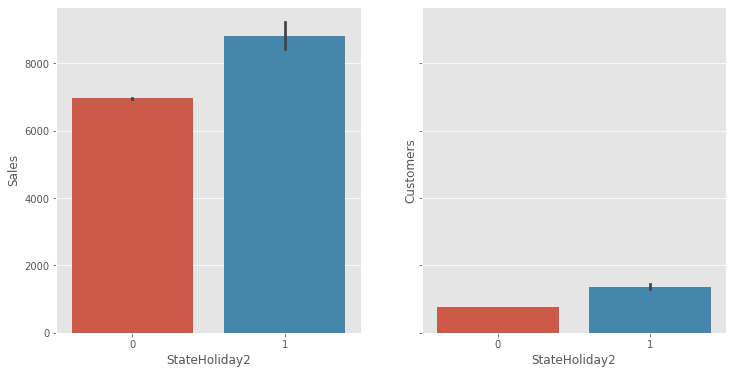

In [106]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2, sharex=True, sharey=True)
sns.barplot(x="StateHoliday2",y="Sales", data=joined_data, ax=ax1)
sns.barplot(x="StateHoliday2",y="Customers", data=joined_data, ax=ax2)
plt.show()

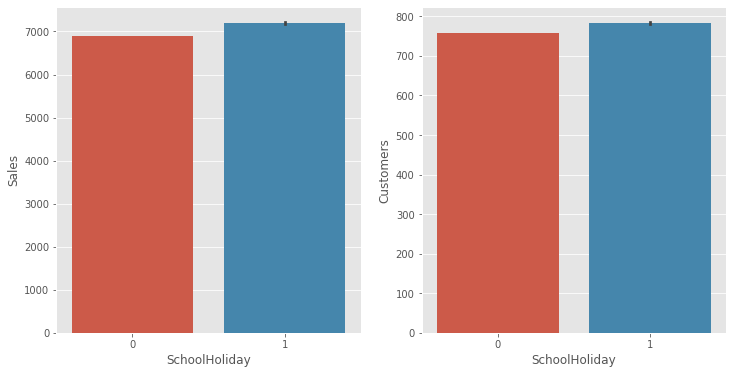

In [107]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2, sharex=True)
sns.barplot(x="SchoolHoliday",y="Sales", data=joined_data, ax=ax1)
sns.barplot(x="SchoolHoliday",y="Customers", data=joined_data, ax=ax2)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


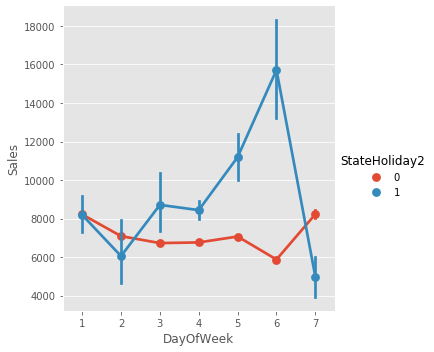

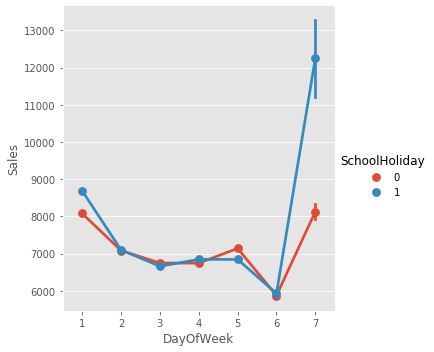

In [108]:
sns.factorplot(data = joined_data, x = "DayOfWeek", y = "Sales", hue = "StateHoliday2")
sns.factorplot(data = joined_data, x = "DayOfWeek", y = "Sales", hue = "SchoolHoliday")


* Sales are impacted by holidays. we notice more sales and more number of costumers on holidays thant other days.
* Sales and number customers are more importante during state holidays than school holidays.
* Also, when a state holiday is a Sunday, sales are low, contrary to schoolholiday when its comes on sunday the sales are very important. 

## 5.5 Impact of Sales and type of store

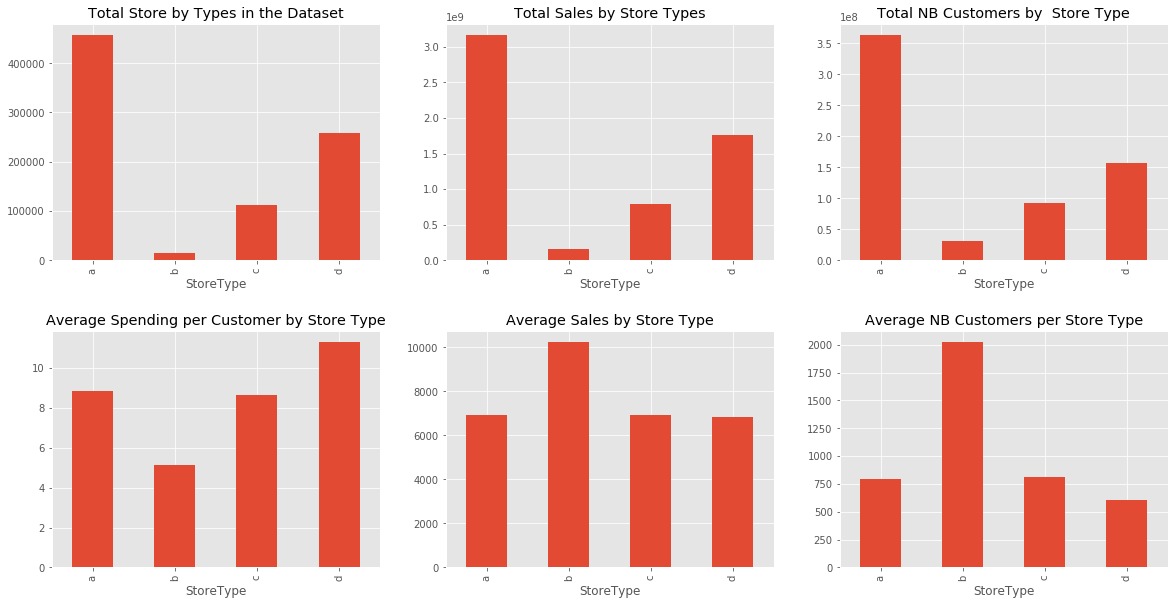

In [109]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))
joined_data.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total Store by Types in the Dataset")
joined_data.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales by Store Types")
joined_data.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total NB Customers by  Store Type")
joined_data.groupby("StoreType")["SalesPerCustomers"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Spending per Customer by Store Type")
joined_data.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Sales by Store Type")
joined_data.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average NB Customers per Store Type")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**Many informations could be extracted from the above analysis:**
* In the dataset, type a' stoes are predominent, which explain the important total of sales and number of customer comparing with other stores'types;
* Howover, stores with type b have the highest selling average and NB customers average, although, they are the least represented type on the datset;
* Also, stores with the type d, are where customers spend the most

## 5.6 Impacte of Sales and store assortments

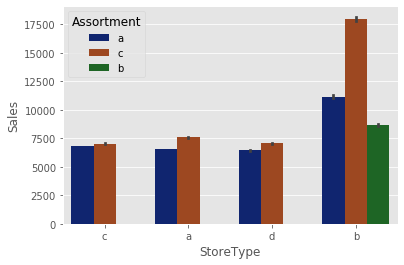

In [110]:
ax=sns.barplot(x="StoreType",y="Sales",hue="Assortment", data=joined_data,palette="dark")


* stores of type b are the only who have the tree assortement type, which could explain their imortant sales and number of customers

## 5.7 Relationship between Sales, promotions and consecutive promotion (promo2)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


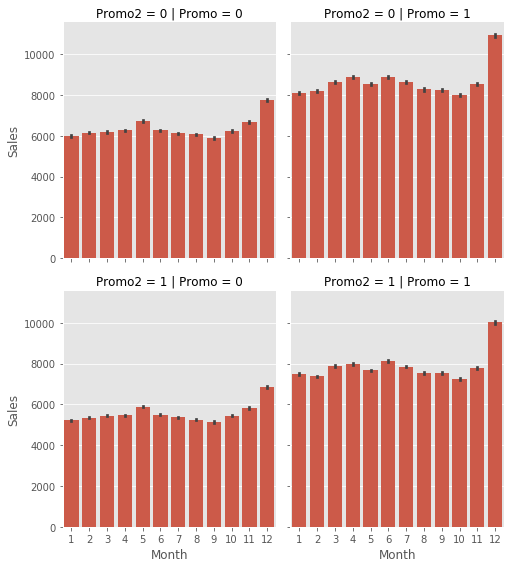

In [111]:
g = sns.FacetGrid(joined_data, col="Promo",  row="Promo2",height=4, aspect=.9)
g.map(sns.barplot, "Month","Sales")

* promotions "promo" increase sales, on the other hande consecutive romotions "promo2" negatively impacte sales!

### 5.7.1 Promotion on days of week

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


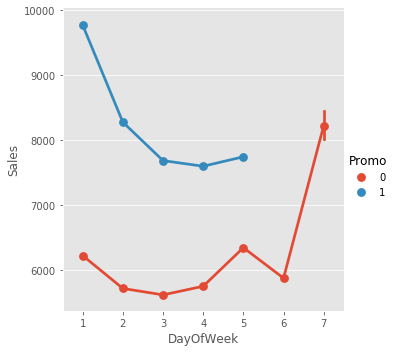

In [112]:
sns.factorplot(data = joined_data, x = "DayOfWeek", y = "Sales", hue = "Promo")


* There is no promotion on weekend
* Promotions generate more sales on Monday

## 5.8 Impact of proximity to competitor and sales

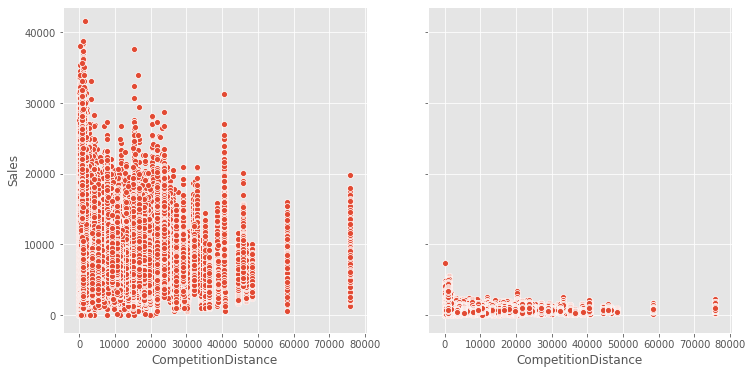

In [113]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2, sharex=True, sharey=True)
x1=sns.scatterplot(x="CompetitionDistance",y="Sales", data=joined_data, ax=ax1)
x2=sns.scatterplot(x="CompetitionDistance",y="Customers", data=joined_data, ax=ax2)
x2.set(ylabel="Customers")
plt.show()

* At first sight we can deduce that the proxemity of competitor doesn't negatively impact sales or number of customers, quit the contrary!

## 5.9 Correlation Matrix

### 5.9.1 Data transforming:
First we have to convert catégorical data to numerical ones 

In [126]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )


In [116]:
joined_data["StoreType"]=joined_data["StoreType"].replace({"a":0,"b":1,"c":2,"d":3})
joined_data["Assortment"]=joined_data["Assortment"].replace({"a":0,"b":1,"c":2})
joined_data["PromoInterval"]=joined_data["PromoInterval"].replace({'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3})



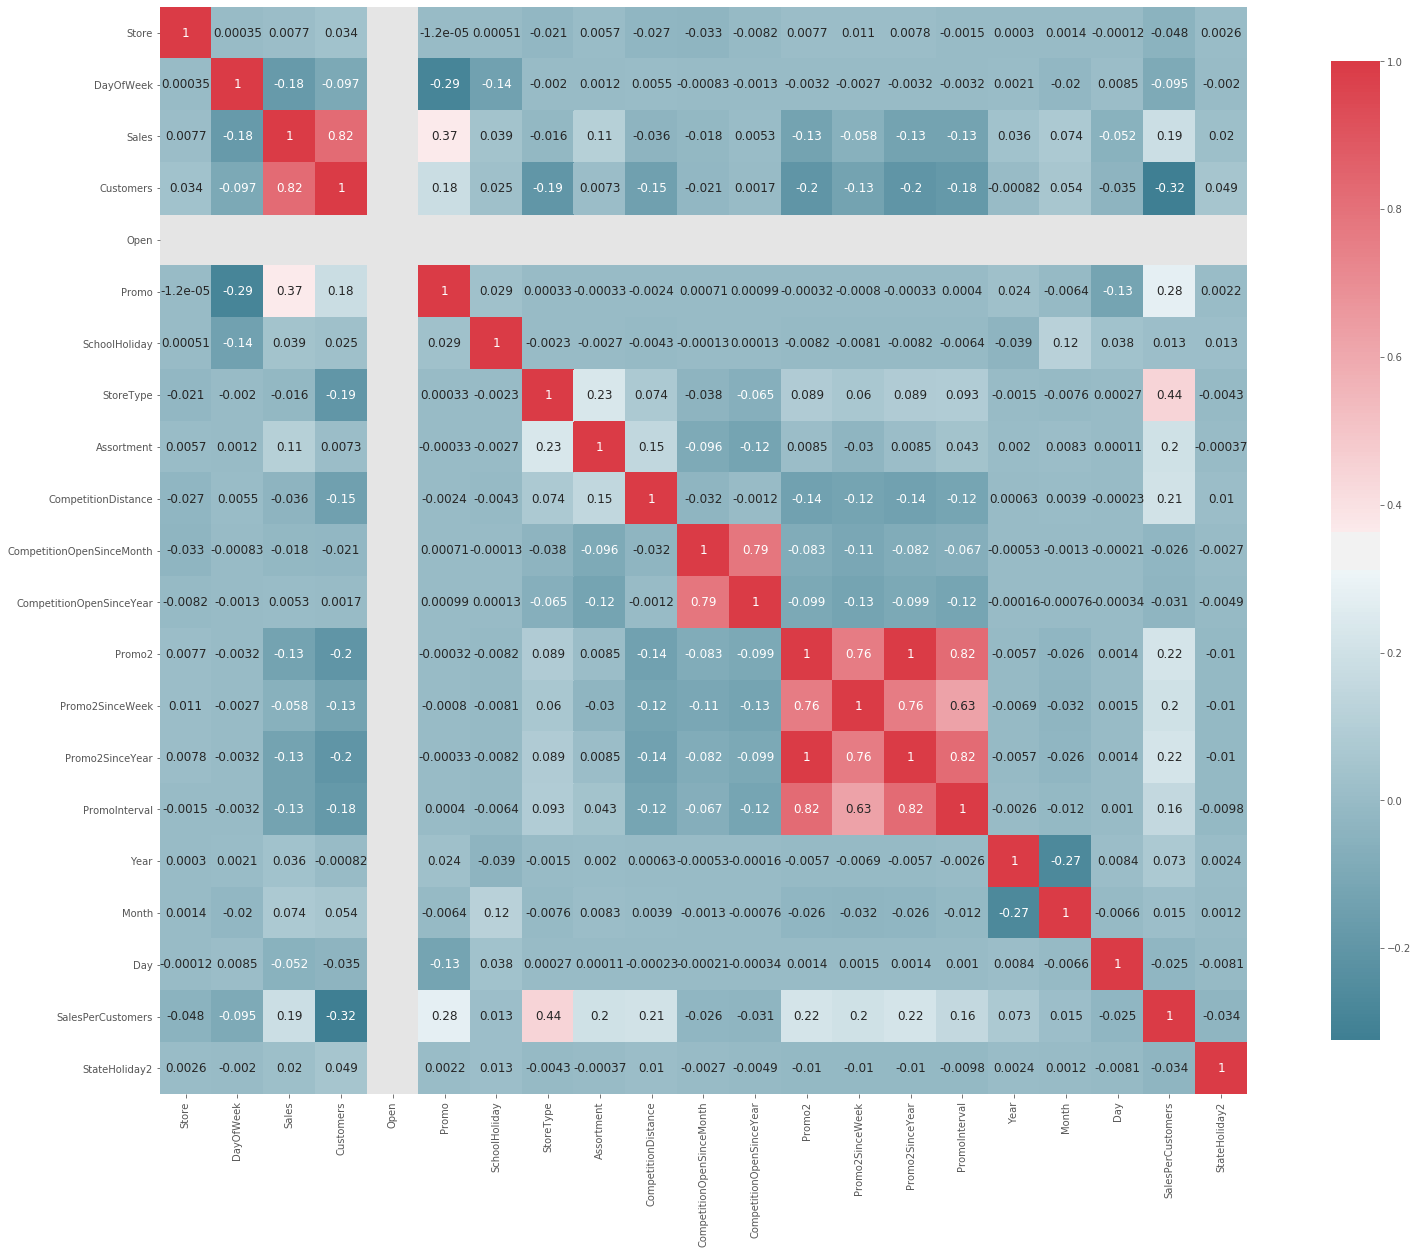

In [125]:
plot_correlation_map(joined_data)

From the correlation matrix we confirm some correlations seen on plotting data:
* sales and Customers: 0.82
* sales and Promo: 0.37
* negative correlation between Sales and Promo2: -0.13
* SalesPerCustomers and StoreType: 0.44
there is also other correlation: SalesPerCustomers and Promo 0.28, SalesPerCustomers and Assortement